In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Анализ температуры городов России

Изучим зависимости между широтой, долготой и средней минимальной температуры января по крупым городам России

In [2]:
cities = pd.read_csv('./cities.csv', sep='\t')
cities.head()

,Город,Широта,Долгота,Страна,Ср. мин. температура января
0,Абакан,53.720976,91.442423,Россия,-22.0
1,Анадырь,64.733330,177.516670,Россия,-26.2
2,Архангельск,64.539304,40.518735,Россия,-16.5
3,Астрахань,46.347869,48.033574,Россия,-6.5
4,Барнаул,53.356132,83.749620,Россия,-20.1


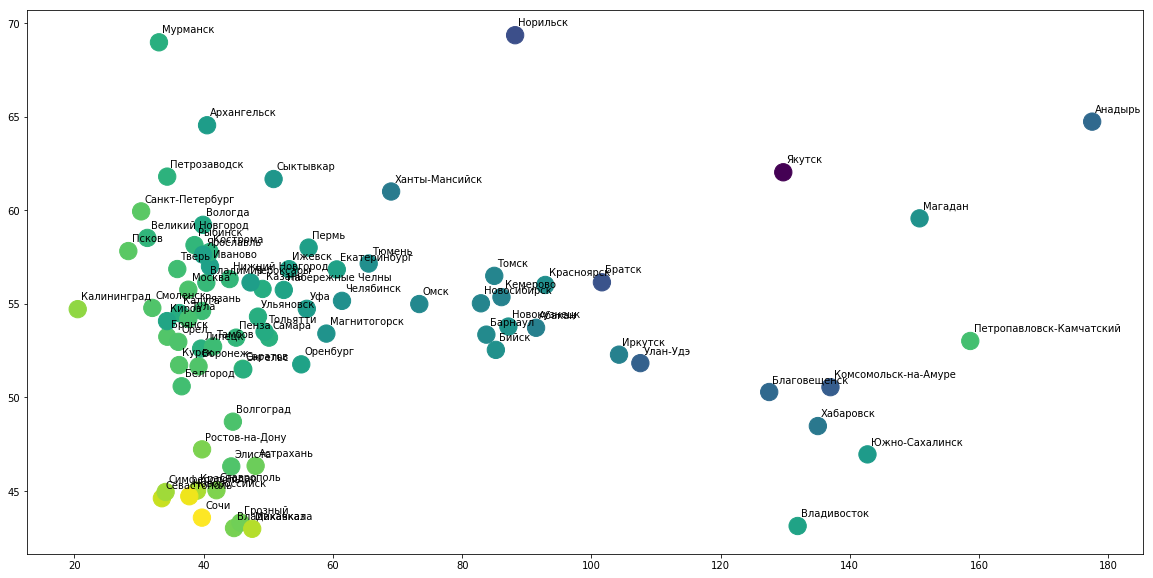

In [3]:
plt.figure(figsize=(20, 10))
plt.scatter(cities['Долгота'], cities['Широта'],
            c=cities['Ср. мин. температура января'], s=300)
for i in range(len(cities)):
    plt.annotate(cities['Город'][i], 
                 (cities['Долгота'][i] + 0.5, cities['Широта'][i] + 0.5),
                 fontsize=10)

Корреляции Спирмена по всем парам переменных.
Видим значимую корреляцию каждой координаты с температурой.
Гипотеза о независимости широты и долготы не отклоняется.

In [4]:
x, y, t = cities['Долгота'], cities['Широта'], cities['Ср. мин. температура января']
n = len(x)
r_xy, p_xy = sps.spearmanr(x, y)
r_xt, p_xt = sps.spearmanr(x, t)
r_yt, p_yt = sps.spearmanr(y, t)

print(sps.spearmanr(x, y))
print(sps.spearmanr(x, t))
print(sps.spearmanr(y, t))

SpearmanrResult(correlation=0.0007727386510812899, pvalue=0.9945026019473004)
SpearmanrResult(correlation=-0.7667207251734454, pvalue=4.5975259597067667e-17)
SpearmanrResult(correlation=-0.43280690529387955, pvalue=4.885540523522442e-05)


### Только европейская часть

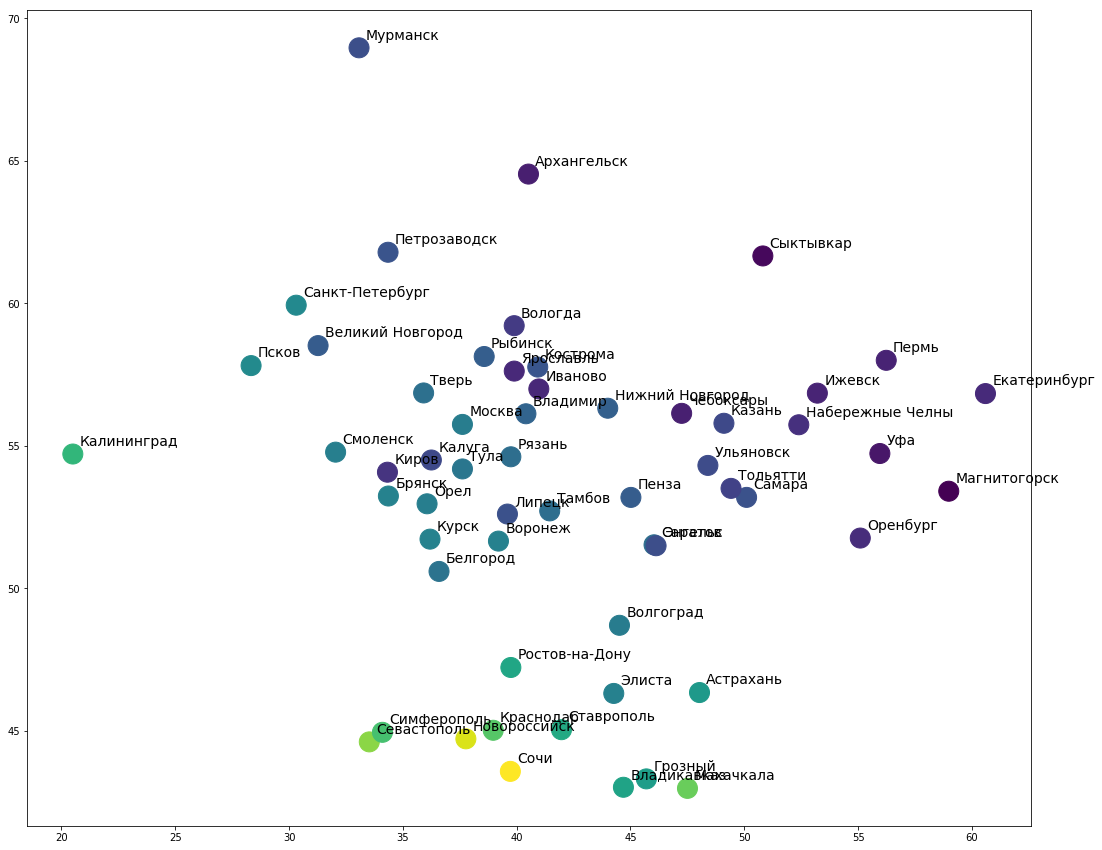

In [5]:
euro_cities = cities[cities['Долгота'] \
                     <= float(cities['Долгота'][cities['Город'] == 'Екатеринбург'])]

plt.figure(figsize=(18, 15))
plt.scatter(euro_cities['Долгота'], euro_cities['Широта'], 
            c=euro_cities['Ср. мин. температура января'], s=400)
for i in range(len(euro_cities)):
    plt.annotate(euro_cities['Город'].iloc[i], 
                 (euro_cities['Долгота'].iloc[i] + 0.3, 
                  euro_cities['Широта'].iloc[i] + 0.3),
                 fontsize=14)

Коэффициенты корреляции Спирмена

In [6]:
x, y, t = euro_cities['Долгота'], euro_cities['Широта'], euro_cities['Ср. мин. температура января']
n = len(x)
r_xy, p_xy = sps.spearmanr(x, y)
r_xt, p_xt = sps.spearmanr(x, t)
r_yt, p_yt = sps.spearmanr(y, t)

print(sps.spearmanr(x, y))
print(sps.spearmanr(x, t))
print(sps.spearmanr(y, t))

SpearmanrResult(correlation=-0.0914570910033705, pvalue=0.49865433501815637)
SpearmanrResult(correlation=-0.5114975131228814, pvalue=4.776257220262623e-05)
SpearmanrResult(correlation=-0.6295029905833054, pvalue=1.5593423445891046e-07)


# Свойства вина

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Загрузим данные о параметрах вин

In [7]:
wine = pd.read_csv('./wine.data')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Удалим класс, поскольку это не вещественная переменная

In [8]:
del wine['Class']

Визуализируем все 2D срезы

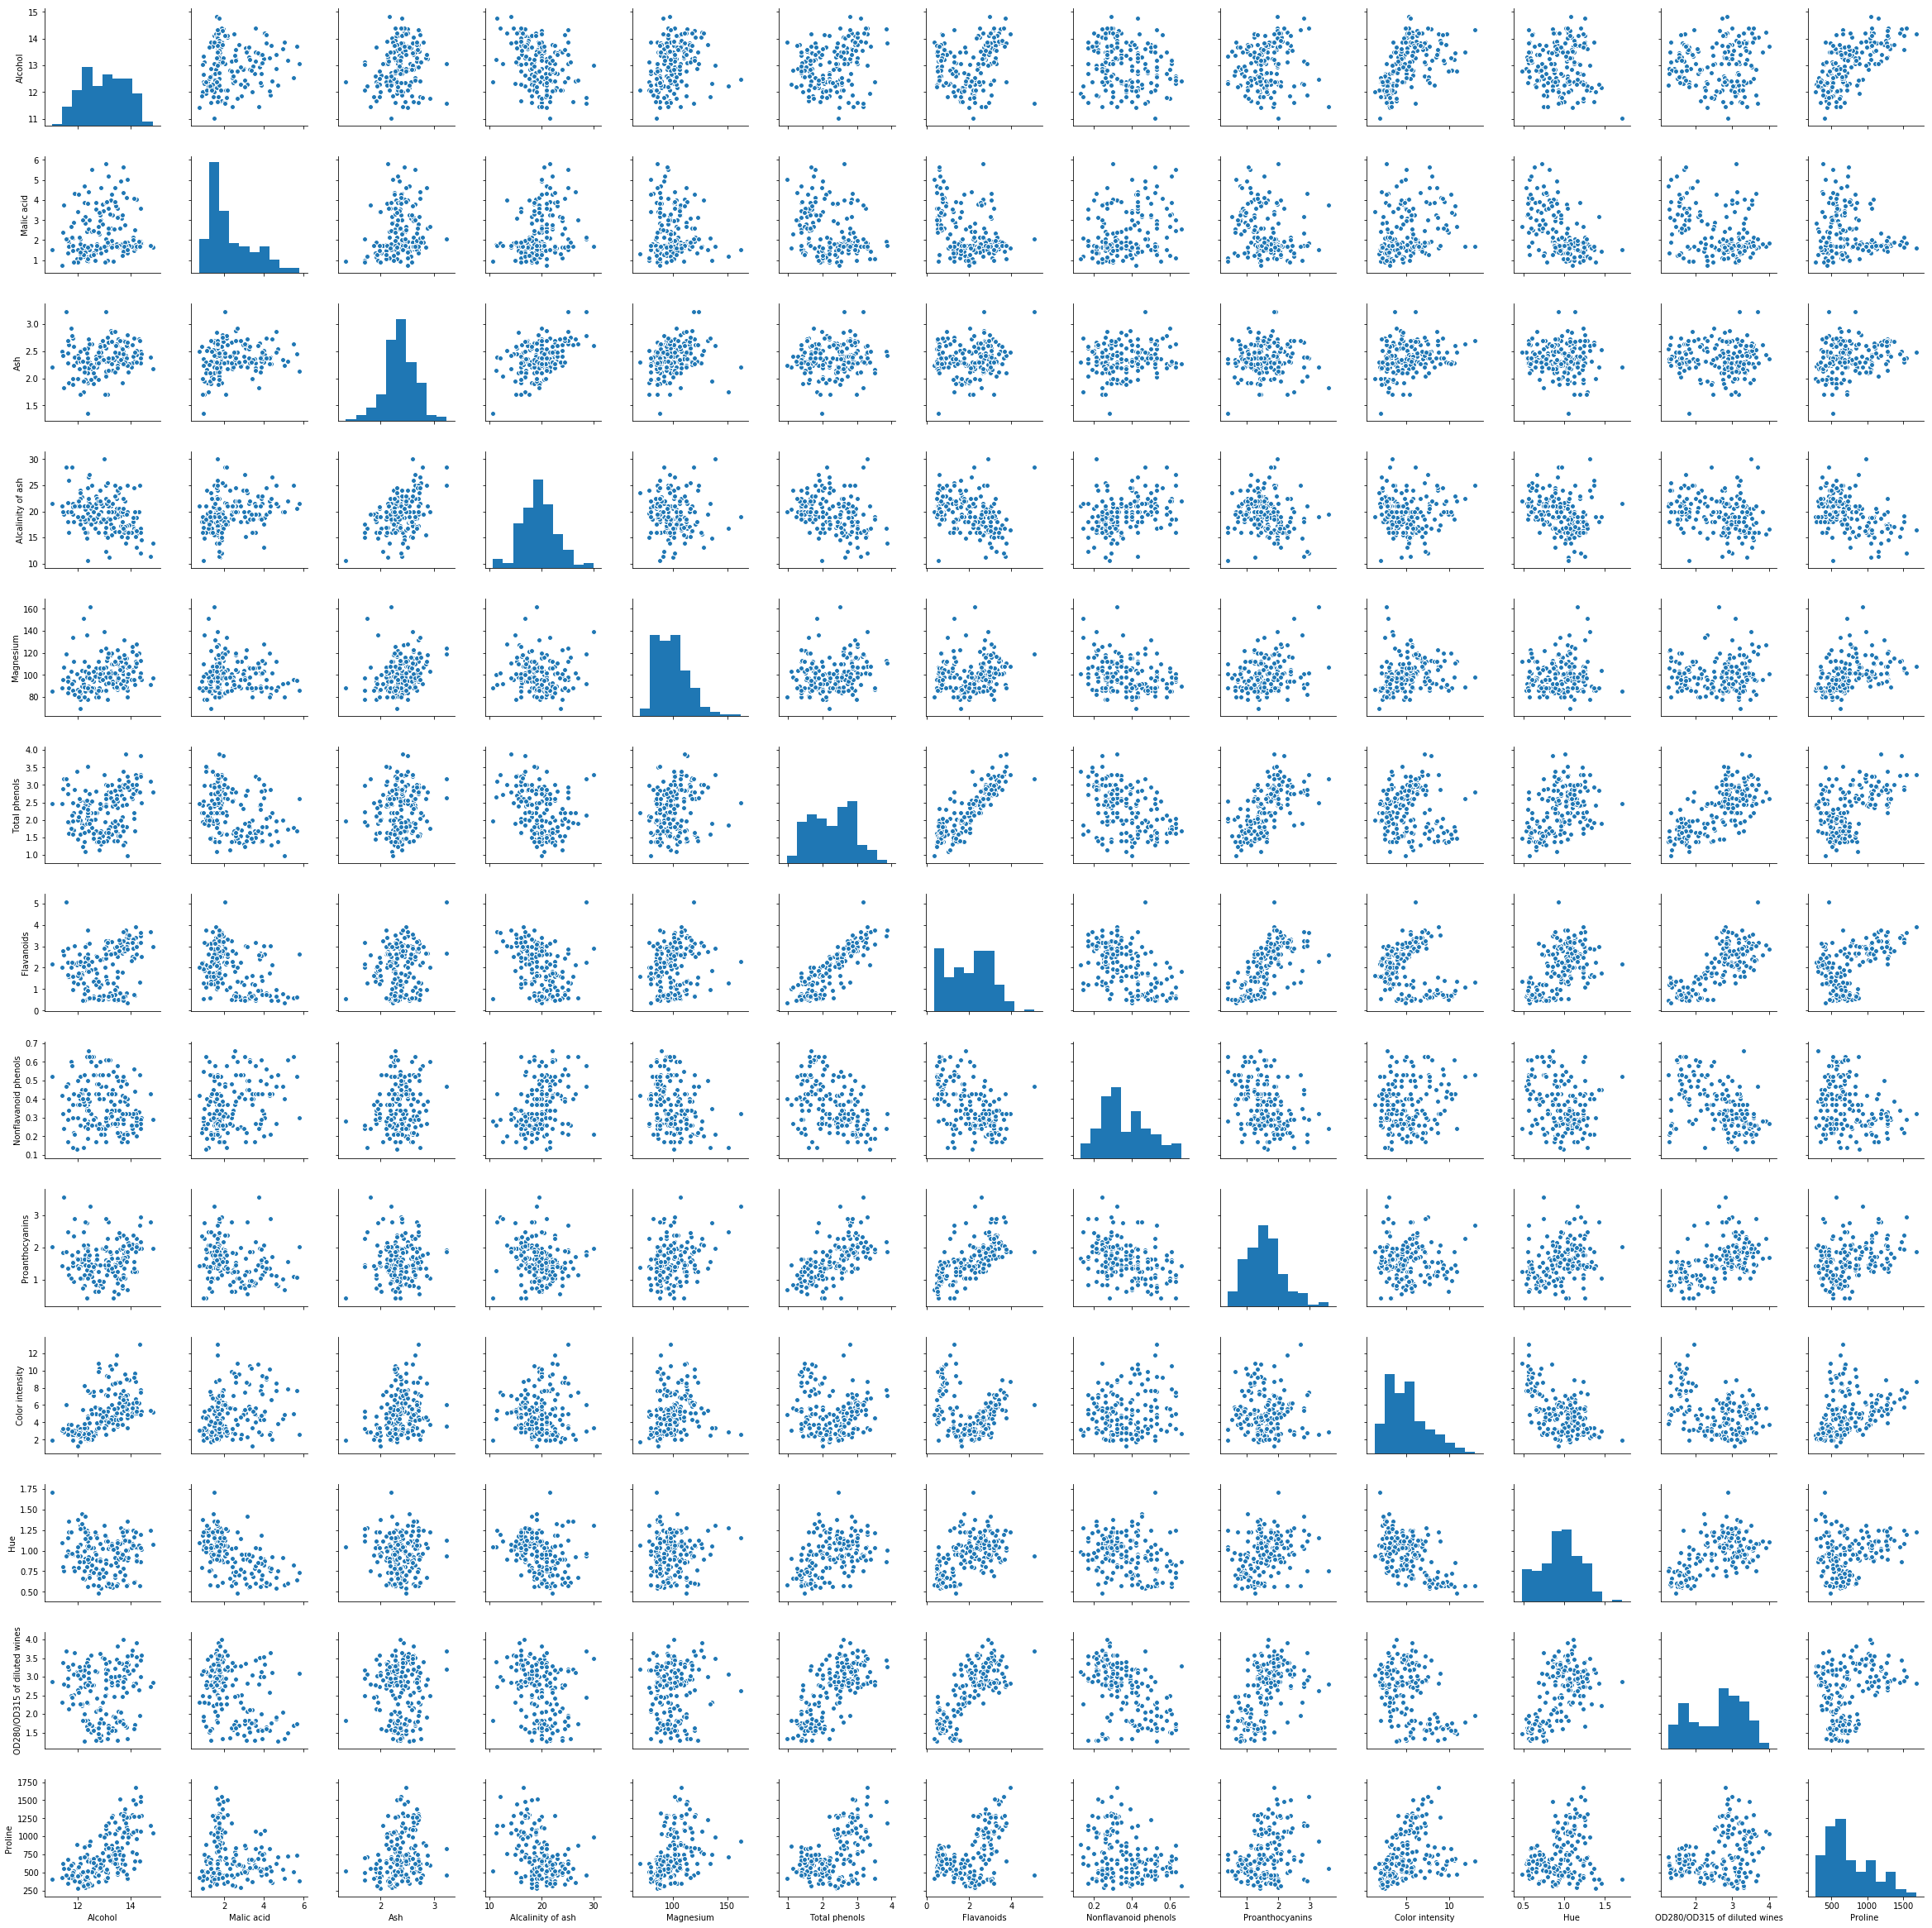

In [9]:
sns.pairplot(wine);

Матрица корреляций по pandas-таблице строится методом `corr`.

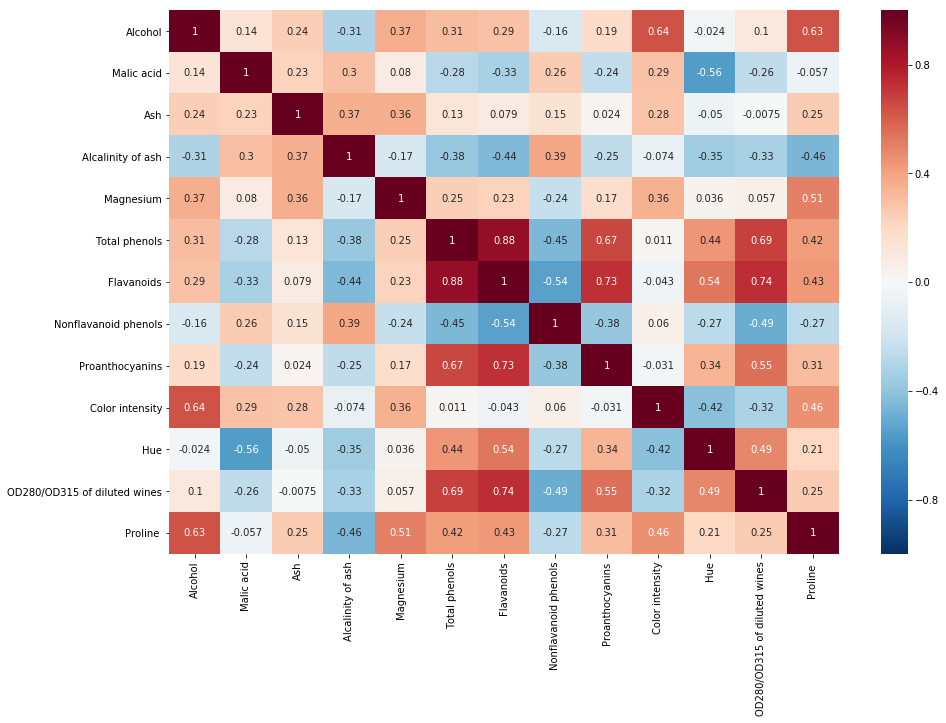

In [10]:
R = wine.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(R, vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

# Отели
https://github.com/Yorko/mlcourse_open/blob/master/data/hostel_factors.csv

Загрузим информацию о нескольких отелях -- рейтинг, цена, качество, услуги.

In [3]:
hostel = pd.read_csv('hostel_factors.csv',
                     skiprows=1,
                     names=['Отель', 'Персонал', 'Бронирование хостела', 
                            'Заезд в хостел и выезд из хостела', 'Состояние комнаты',
                            'Состояние общей кухни', 'Состояние общего пространства',
                            'Дополнительные услуги', 'Общие условия и удобства', 
                            'Цена/качество', 'ССЦ', 'Рейтинг'])

hostel.head()

,Отель,Персонал,Бронирование хостела,Заезд в хостел и выезд из хостела,Состояние комнаты,Состояние общей кухни,Состояние общего пространства,Дополнительные услуги,Общие условия и удобства,Цена/качество,ССЦ,Рейтинг
0,hostel1,0.675000,0.100000,0.300000,0.875000,0.250000,0.425000,0.350000,0.725000,0.400000,0.275000,9.0
1,hostel2,0.500000,0.000000,0.058824,0.573529,0.117647,0.382353,0.000000,0.161765,0.308824,0.000000,8.3
2,hostel3,0.520833,0.041667,0.020833,0.666667,0.229167,0.437500,0.270833,0.250000,0.395833,0.270833,8.6
3,hostel4,0.692308,0.038462,0.038462,0.346154,0.076923,0.307692,0.500000,0.115385,0.153846,0.269231,7.6
4,hostel5,0.620690,0.000000,0.000000,0.517241,0.172414,0.344828,0.172414,0.379310,0.103448,0.310345,8.7


Количество отелей

In [4]:
len(hostel)

18

Корреляции признаков с рейтингом.
Получаем степень влияния на рейтинг.

In [5]:
correlations = hostel.corr(method='spearman')['Рейтинг'].iloc[:-1].sort_values()
correlations

Цена/качество                       -0.351298
Состояние комнаты                   -0.235875
Состояние общей кухни               -0.176167
Заезд в хостел и выезд из хостела   -0.053646
Бронирование хостела                 0.105761
ССЦ                                  0.211458
Дополнительные услуги                0.336459
Состояние общего пространства        0.349226
Общие условия и удобства             0.401765
Персонал                             0.459308
Name: Рейтинг, dtype: float64

Визуализируем полученные корреляции

In [9]:
sns.set(font_scale=1.3, style='white', palette='Set2')

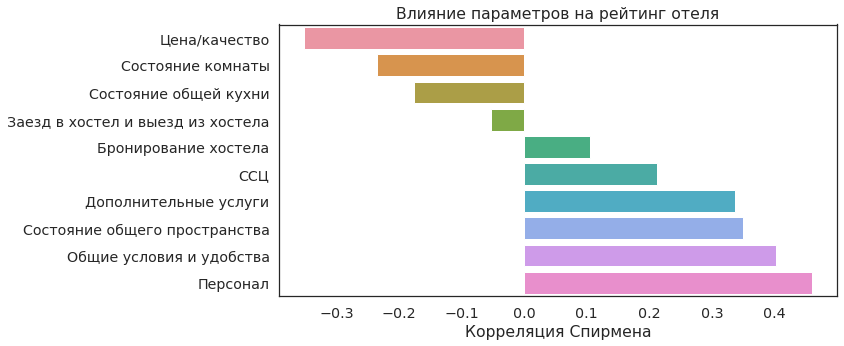

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(y=correlations.index, x=correlations)
plt.title('Влияние параметров на рейтинг отеля')
plt.xlabel('Корреляция Спирмена')
plt.savefig('hostel_corr.png', facecolor=(0,0,0,0))

Посмотрим, как влияют признаки на обучение модели Random Forest. Обучим 100 деревьев

In [11]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(hostel.iloc[:, 1:-1], hostel.iloc[:, -1])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Извлечем автоматически посчитаные важности признаков и отсортируем их по убыванию

In [12]:
fi = pd.Series(rf.feature_importances_,
                  index=hostel.iloc[:, 1:-1].columns)
fi = fi.sort_values(ascending=False)

Визуализируем

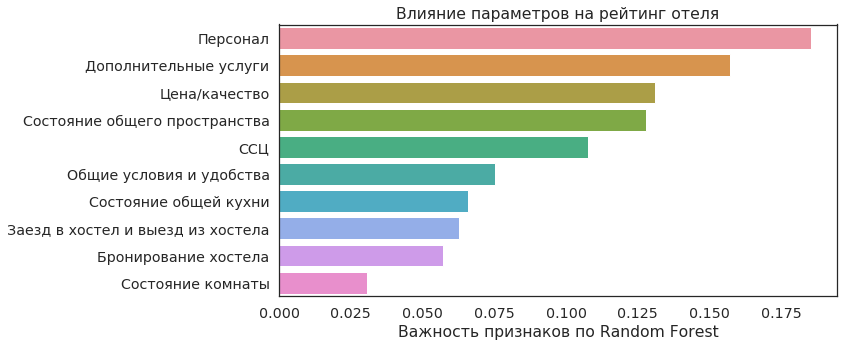

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(y=fi.index, x=fi)
plt.title('Влияние параметров на рейтинг отеля')
plt.xlabel('Важность признаков по Random Forest')
plt.savefig('hostel_spearman.png', facecolor=(0,0,0,0))

Еще пример на важность признаков: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py

Важность признаков в CatBoost: https://tech.yandex.com/catboost/doc/dg/concepts/fstr-docpage/

# Communities and Crime Data Set

http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

Посмотрим на данные. В них есть некоторое количество пропусков

In [20]:
df = pd.read_csv('./communities.data.txt', header=None, na_values='?')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
5,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
6,44,7.0,41500.0,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.03
7,6,NaN,NaN,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.55
8,21,NaN,NaN,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,NaN,NaN,NaN,NaN,0.00,NaN,0.53
9,29,NaN,NaN,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,NaN,NaN,NaN,NaN,0.00,NaN,0.15


Визуализируем матрицу корреляций Спирмена. Визуально кажется, что имеются кластеры признаков, то есть группы признаков, внутри которых признаки сильно коррелирую друг с другом.

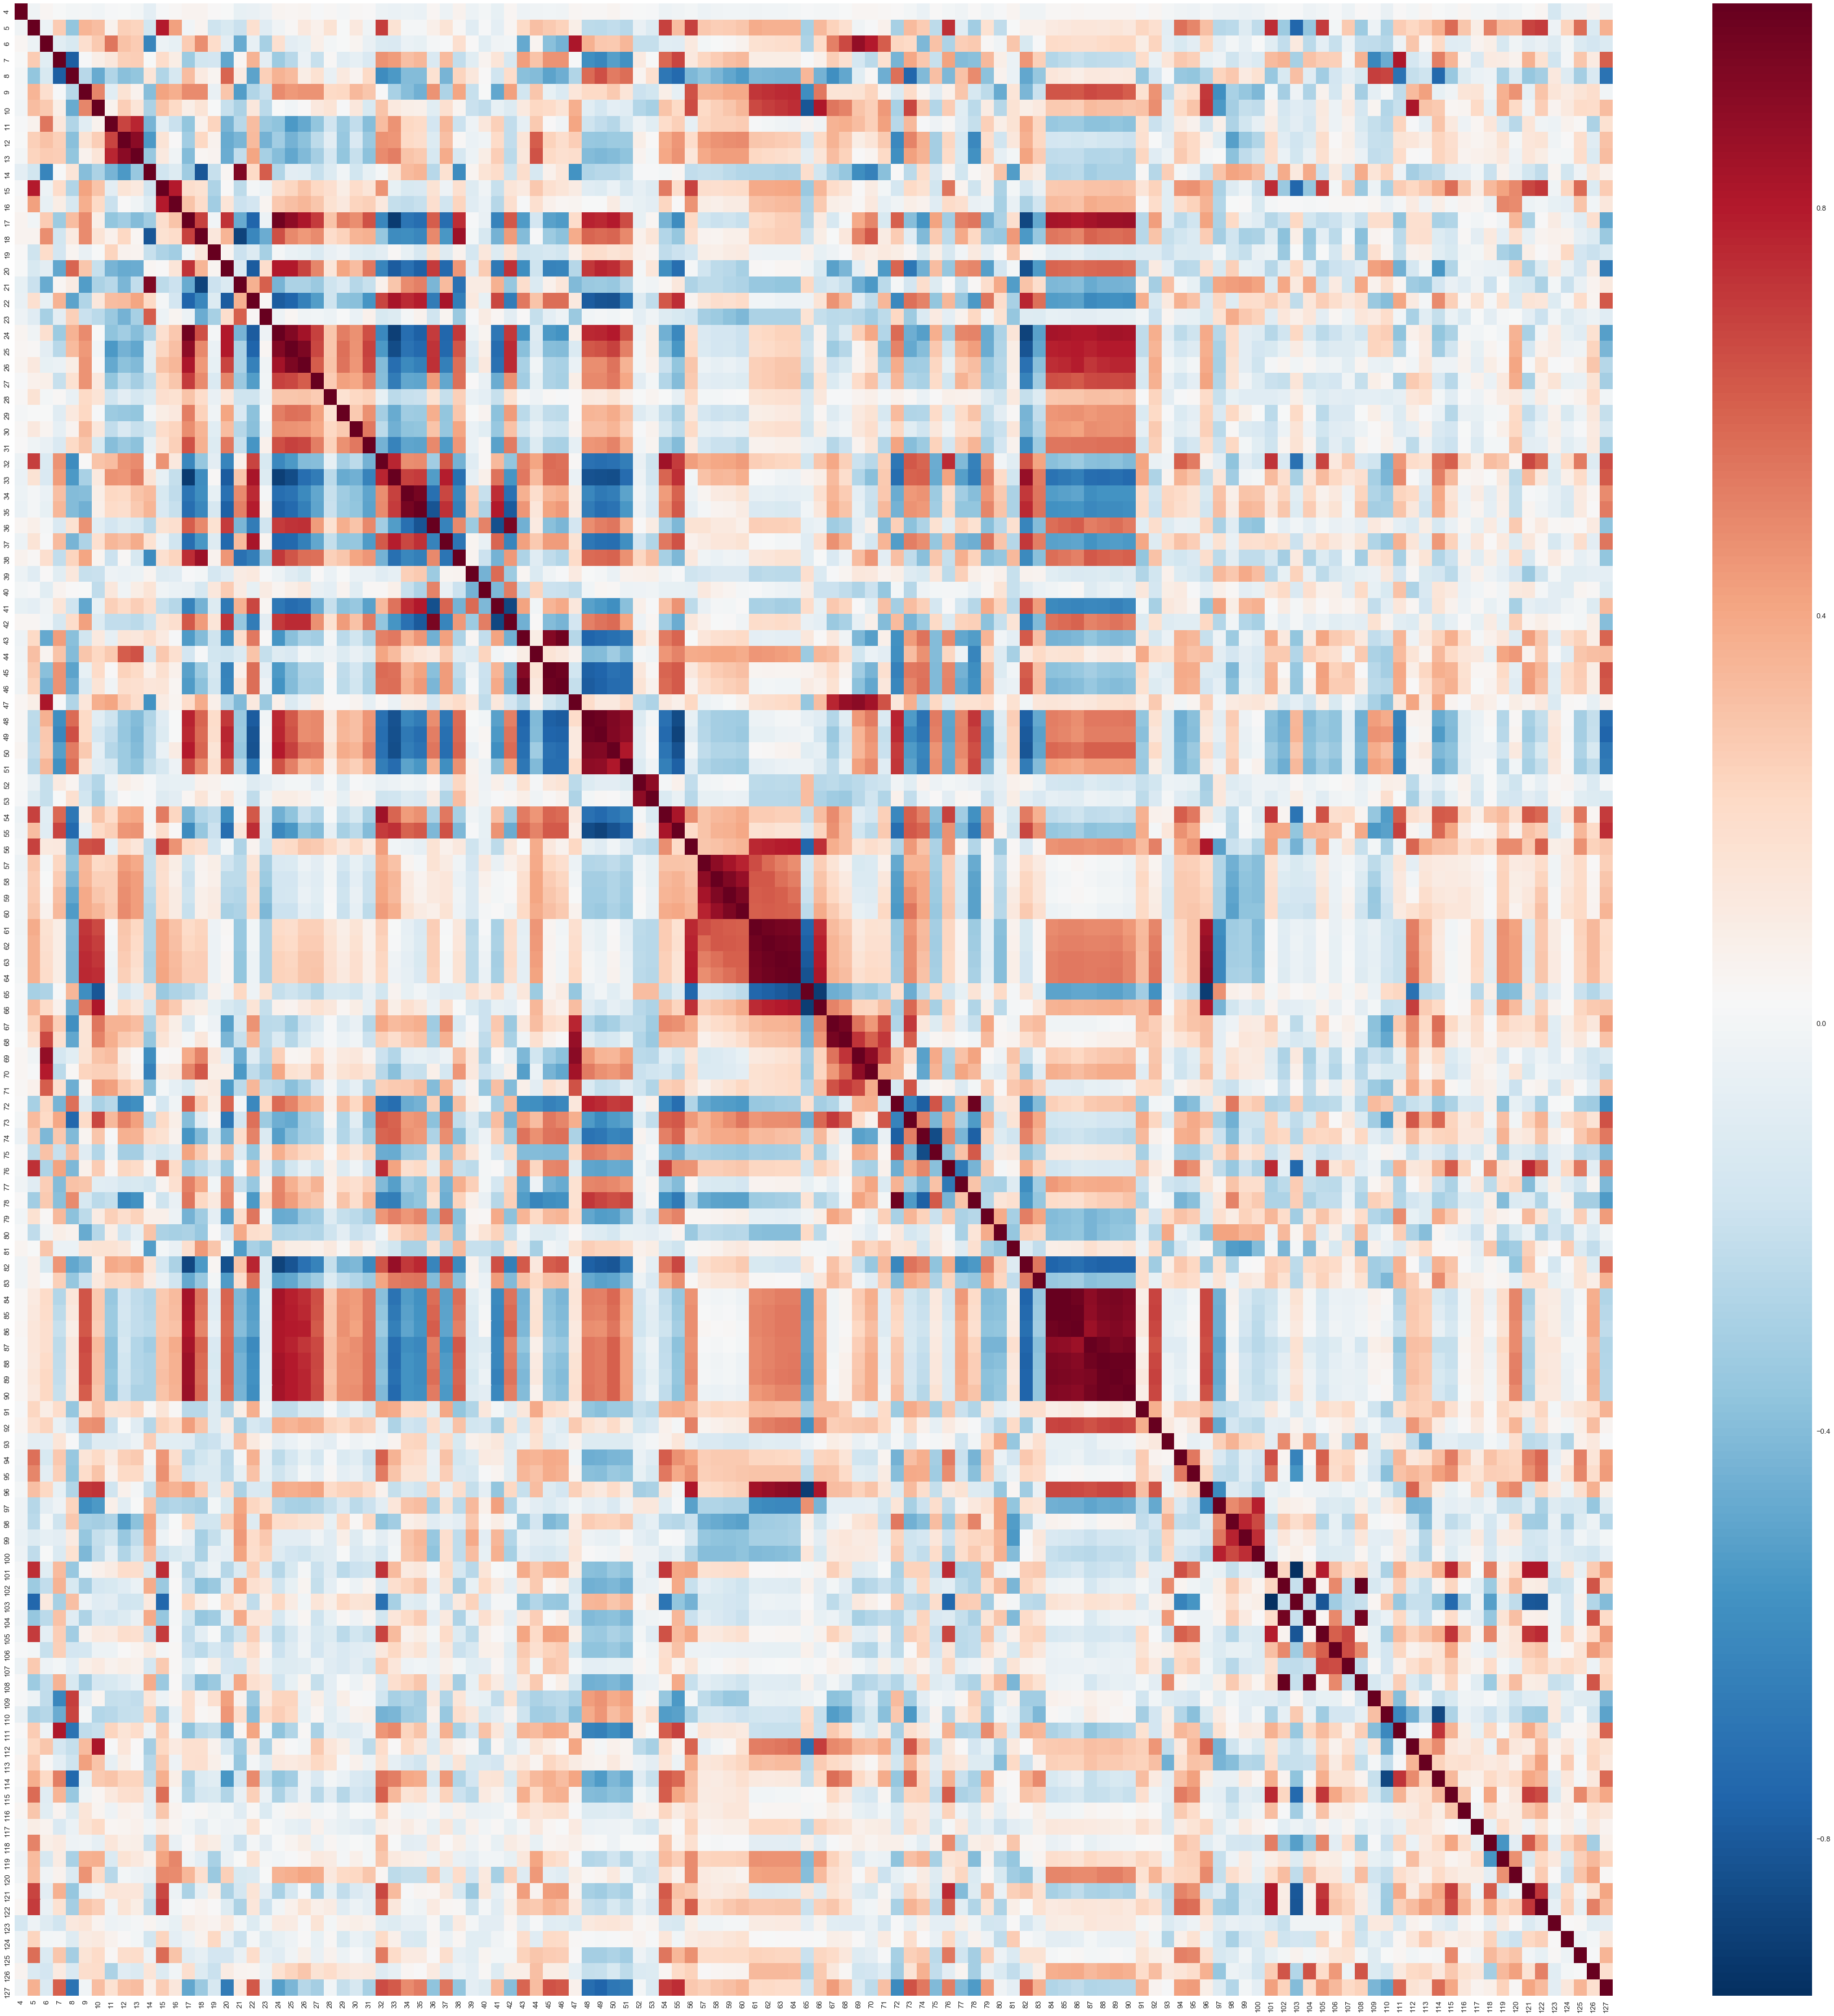

In [21]:
correlation_matrix = df.iloc[:, 4:].corr(method='spearman')

plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, cmap='RdBu_r')
plt.tight_layout()

Для кластеризации признаков воспользуемся методом иерархической кластеризации. Сначала на основе корреляций определим матрицу расстояний между признаками по правилу
$$dist(i, j) = 1 - \left| \widehat{corr}(X_i, X_j) \right|.$$
На основе этих расстояний построим дендрограмму, которая по определенным расстояниям выделит кластеры параметров и упорядочит признаки в соответствии с этими кластерами. В этом порядке отобразим корреляционную матрицу.

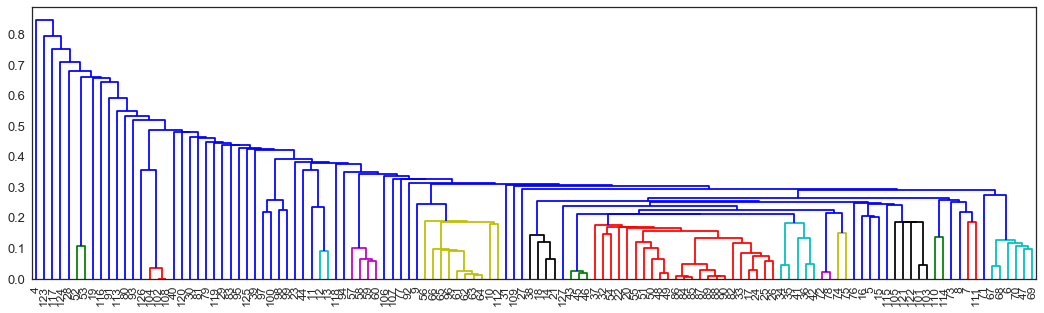

2 elements: [52, 53]
3 elements: [102, 104, 108]
2 elements: [12, 13]
4 elements: [57, 58, 59, 60]
10 elements: [10, 56, 61, 62, 63, 64, 65, 66, 96, 112]
4 elements: [14, 18, 21, 38]
3 elements: [43, 45, 46]
23 elements: [17, 20, 22, 24, 25, 26, 32, 33, 37, 48, 49, 50, 51, 54, 55, 82, 84, 85, 86, 87, 88, 89, 90]
5 elements: [34, 35, 36, 41, 42]
2 elements: [72, 78]
2 elements: [74, 75]
5 elements: [101, 103, 105, 121, 122]
2 elements: [110, 114]
2 elements: [7, 111]
6 elements: [6, 47, 67, 68, 69, 70]


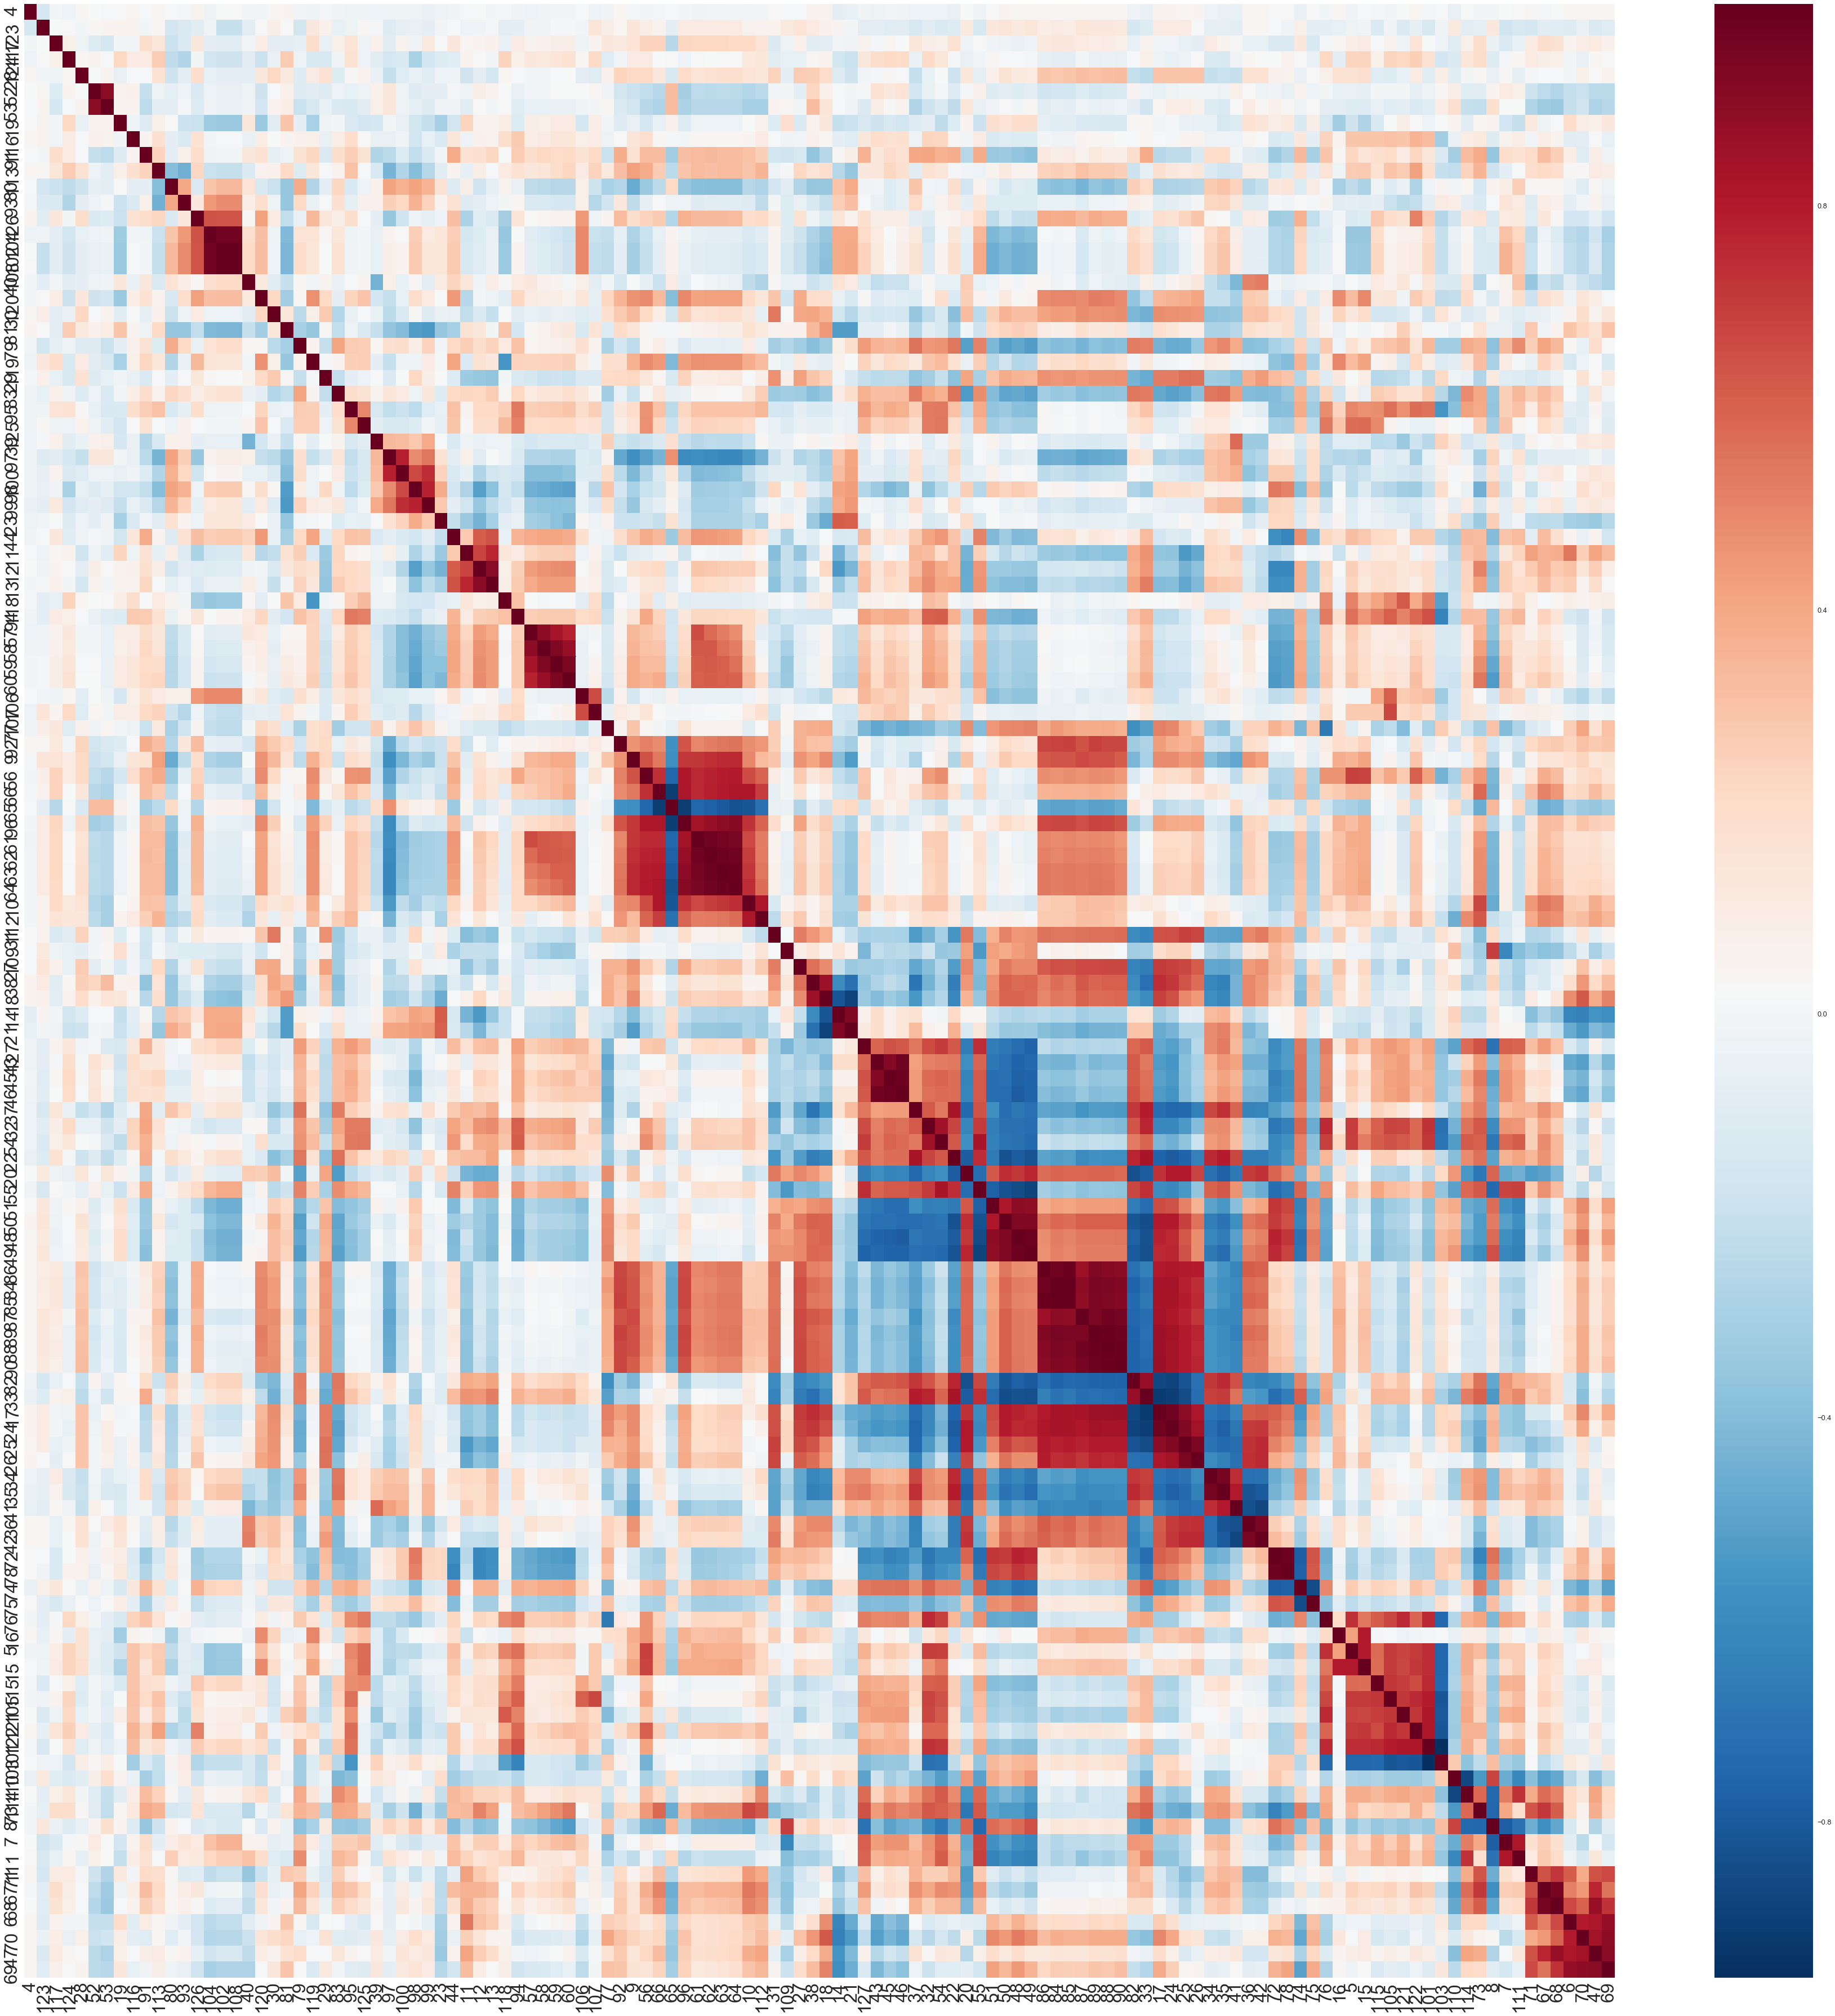

In [22]:
# матрица расстояний
dist_matrix = np.array(1 - correlation_matrix.abs())
# если какие-то корреляции не определены, заменим расстояния на 1
# вне диагонали, и 0 на диагонале
dist_matrix[np.isnan(dist_matrix)] = (1 - np.eye(len(dist_matrix)))[np.isnan(dist_matrix)]

# Определение вспомогательных объектов для кластеризации
dists = squareform(dist_matrix)
linkage_matrix = linkage(dists, "single")

# Отрисовка дентрограммы
plt.figure(figsize=(18, 5))  
dendrogram_result = dendrogram(linkage_matrix, orientation='top',
                               labels=correlation_matrix.columns,
                               color_threshold=0.2, distance_sort='descending',
                               show_leaf_counts=True)
plt.xticks(fontsize=12)
plt.show() 

# создаем корреляционную матрицу с параметрами в нужном порядке
correlation_matrix = df[dendrogram_result['ivl']].corr(method='spearman')

plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, cmap='RdBu_r')
plt.xticks(fontsize=32), plt.yticks(fontsize=32)
plt.tight_layout();

# Печать самих кластеров
clusters = fcluster(linkage_matrix, 0.2, criterion='distance')
elements, repeats = np.unique(clusters, return_counts=True)
for cl in elements[repeats > 1]:
    print((clusters == cl).sum(), 'elements:', list(df.iloc[:, 4:].columns[clusters == cl]))

---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/